In [1]:
#matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# For Chinese font
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="NotoSansCJKtc-Regular.otf", size=10)

data = pd.read_csv('pm25_2000_2014.csv')
data2015 = pd.read_csv('pm25_2015.csv')

In [2]:
cs = pd.read_csv('CS_enents_2000-2015.csv')
ne = pd.read_csv('NE_enents_2000-2015.csv')
sw = pd.read_csv('SW_enents_2000-2015.csv')
ft = pd.read_csv('FT_enents_2000-2015.csv')
tc = pd.read_csv('TC_enents_2000-2015.csv')

In [3]:
cs.head()
print(cs.shape)
csmask = np.empty((3642,))
nemask = np.empty((3642,))
swmask = np.empty((3642,))
ftmask = np.empty((3642,))
tcmask = np.empty((3642,))
csmask[:,] = cs.iloc[2192:5834,1]
nemask[:,] = ne.iloc[2192:5834,1]
swmask[:,] = sw.iloc[2192:5834,1]
ftmask[:,] = ft.iloc[2192:5834,1]
tcmask[:,] = tc.iloc[2192:5834,2]
print(csmask.shape)
print(tcmask[:,])

(5844, 2)
(3642,)
[0. 0. 0. ... 0. 0. 0.]


In [4]:
pm25 = data.iloc[:,2:]
pm25.index = data['date']+':'+data['hour']

pm25_ma24 = pm25.rolling(24).mean()

pm251 = data.iloc[52608:131496,2:]
#pm251.index = data['date']
pm251_ma24 = pm251.rolling(24).mean()
pm251_ma24.head()



,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,陽明,善化,萬里,三重,新營,斗六,中山,新港,安南,林園
52608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


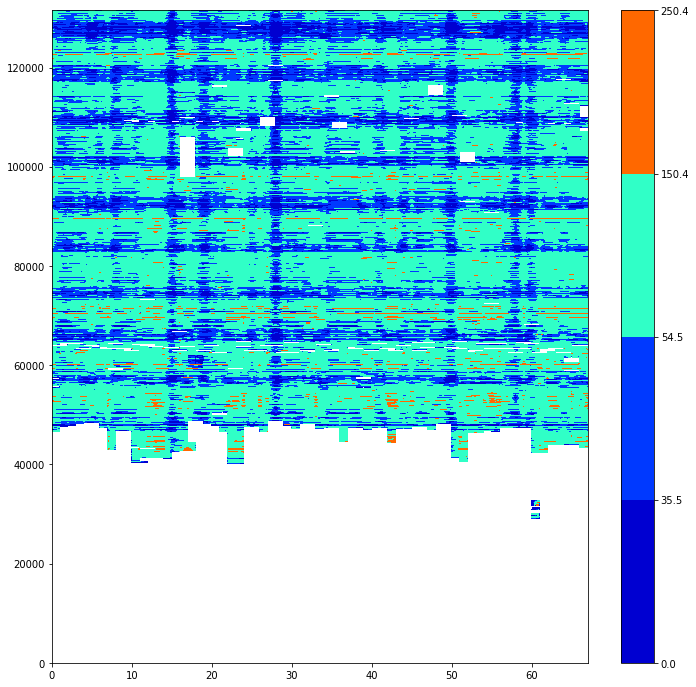

In [5]:
plt.figure(figsize=(12,12))
plt.contourf(pm25.values[:], levels=[0, 35.5, 54.5, 150.4, 250.4], cmap='jet')
#print(pm25.columns)
plt.colorbar()
aaaa=list(pm25.columns)

#print(aaaa)
#plt.xticks(np.arange(0,68,1), aaaa, rotation=90, fontproperties=font)

In [6]:
leftstation = aaaa

print(leftstation)
pm2506 = data.values[52608:131496,2:]


['嘉義', '龍潭', '淡水', '湖口', '苗栗', '美濃', '大園', '前鎮', '基隆', '板橋', '古亭', '南投', '潮州', '小港', '仁武', '花蓮', '馬祖', '崙背', '萬華', '冬山', '竹東', '松山', '沙鹿', '忠明', '大寮', '頭份', '屏東', '中壢', '恆春', '新竹', '士林', '觀音', '線西', '左營', '埔里', '新店', '新莊', '永和', '菜寮', '朴子', '彰化', '汐止', '復興', '前金', '平鎮', '西屯', '林口', '桃園', '豐原', '三義', '宜蘭', '鳳山', '大里', '二林', '楠梓', '竹山', '橋頭', '土城', '陽明', '善化', '萬里', '三重', '新營', '斗六', '中山', '新港', '安南', '林園']


In [7]:
#pmleft = np.empty((78888,68))
pmleft = np.empty((87648,68))
pmleft[:,:] = np.nan
pmleft[0:78888,:] = pm2506[:,:]

leftdate = [0]*87648
aaa=list(pm25.index)
leftdate[0:78888] = aaa[52608:131496]
#print(leftdate)
#print(aaa)

In [8]:
col2015= list(data2015.columns)

date2015 = [0]*8760
from datetime import datetime, timedelta  
testdate = data2015['date']
#print(testdate.head)
for i in range(0,8760):
 aa = datetime.strptime(testdate[i],'%Y/%m/%d')

 traa = datetime.strftime(aa,'%Y-%m-%d')
 date2015[i]=traa
#print(date2015)
pm2015 = data2015.iloc[:,0]
outdate2015=pd.DataFrame(date2015,columns=['date'])
pm2015.index = outdate2015['date']+':'+data2015['hour']
aaaa2015=list(pm2015.index)
#print(aaaa2015)
leftdate[78888:87648] = aaaa2015
#aaa = datetime.strftime(newdate,'%d%b%Y')

In [9]:

#print(pm2015)
for i in range(0,78):
 for j in range(0,68):
  if col2015[i] in leftstation[j]:
   121212 
   pmleft[78888:87648,j] = data2015.values[:,i]
#   print(col2015[i])
#  print(leftstation[j])
#plt.contourf(pmleft[80000:87648,:],cmap='jet')


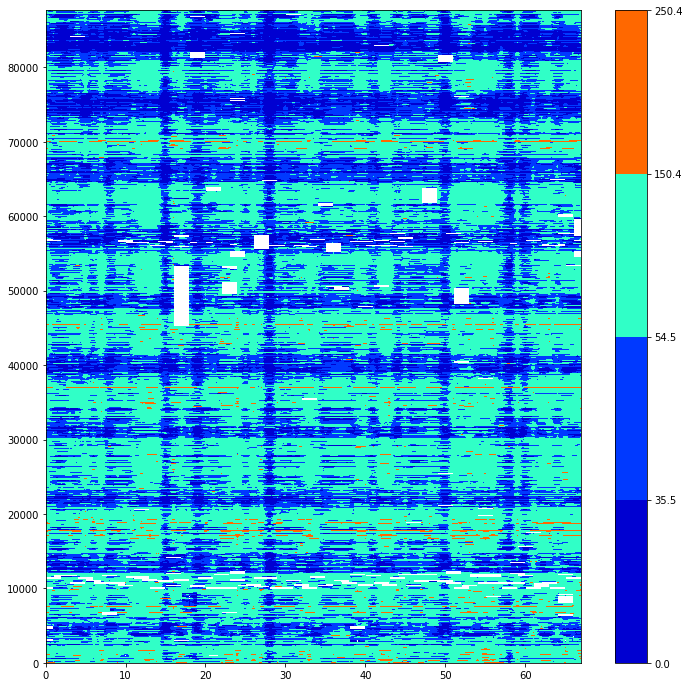

In [10]:

fig = plt.figure(figsize=(12,12))
plt.contourf(pmleft,levels=[0, 35.5, 54.5, 150.4, 250.4], cmap='jet')
plt.colorbar()

In [11]:
outputpm=pd.DataFrame(pmleft,index=leftdate,columns=leftstation)
#outputpm.head()

#pm251.index = data['date']
pm_ma24 = outputpm.rolling(24).mean()
pm_ma24.head()
#print(pm_ma24.index)

,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,陽明,善化,萬里,三重,新營,斗六,中山,新港,安南,林園
2006-01-01:h00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01:h01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01:h02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01:h03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01:h04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
 # Function to compute summed air-pollution-index and cut the whole series with specified time window
def api_timeseries(outputpm, threshold=54.5, window=240):
    tmp = (outputpm>=threshold)*1
    tmp = tmp.sum(axis=1)
    ts = {}
    for i in np.arange(23+window, len(tmp), 24):
        #print('Index: '+str(i-window)+' ~ '+str(i))
        ts[tmp.index[i]] = list(tmp[i-window:i])
    df = pd.DataFrame(ts)
    return(df)

apts = api_timeseries(pm_ma24)
apts.head()


,2006-01-11:h23,2006-01-12:h23,2006-01-13:h23,2006-01-14:h23,2006-01-15:h23,2006-01-16:h23,2006-01-17:h23,2006-01-18:h23,2006-01-19:h23,2006-01-20:h23,...,2015-12-22:h23,2015-12-23:h23,2015-12-24:h23,2015-12-25:h23,2015-12-26:h23,2015-12-27:h23,2015-12-28:h23,2015-12-29:h23,2015-12-30:h23,2015-12-31:h23
0,8,13,42,48,18,1,10,14,10,12,...,0,0,0,7,49,3,0,0,1,3
1,8,14,43,48,16,1,10,14,10,12,...,0,0,0,8,47,3,0,0,1,2
2,8,14,42,48,14,1,10,14,11,12,...,0,0,0,11,45,2,0,0,1,1
3,8,14,43,48,13,1,10,14,11,12,...,0,0,0,15,40,2,0,0,1,1
4,8,15,42,47,13,2,10,14,11,13,...,0,0,0,19,35,1,0,0,1,1


In [13]:
#apts.to_csv('apts_68station.csv', index=False)

[3 3 4 ... 1 2 2]


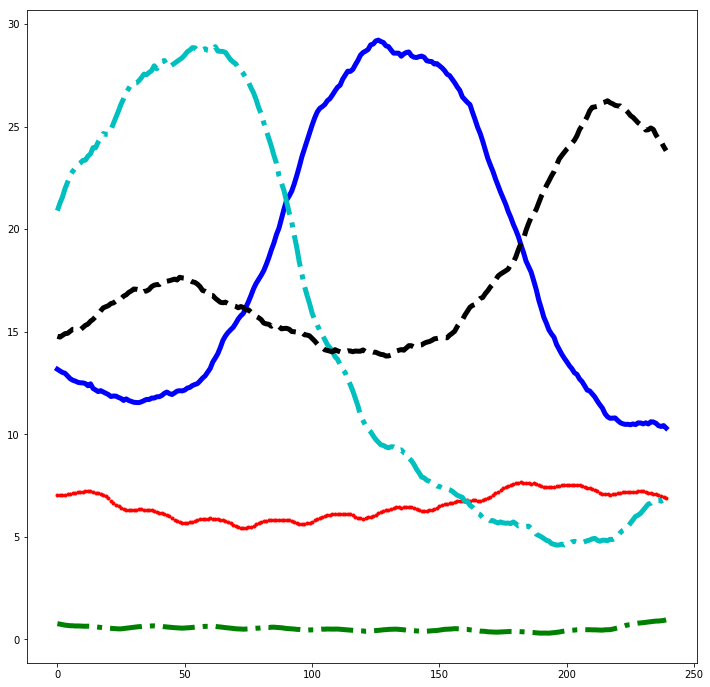

In [14]:
from sklearn.cluster import AgglomerativeClustering

data11 = pd.read_csv('apts_68station.csv')
#print(data11.head())
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hc.fit_predict(data11.T) 

print(hc.labels_)
fig = plt.figure(figsize=(12,12))
plt.plot(data11.iloc[:,hc.labels_==0].mean(axis=1),'b-',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==1].mean(axis=1),'r.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==2].mean(axis=1),'g-.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==3].mean(axis=1),'c-.',linewidth=5)
plt.plot(data11.iloc[:,hc.labels_==4].mean(axis=1),'k--',linewidth=5)
#blue red green cyan brown
#plt.plot(data11.iloc[:,hc.labels_==2].mean(axis=1),color='green', linestyle='solid',linewidth=6)
#plt.plot(data11.iloc[:,hc.labels_==0].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==3].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==1].mean(axis=1),color='grey', linestyle='dashed')
#plt.plot(data11.iloc[:,hc.labels_==4].mean(axis=1),color='grey', linestyle='dashed')


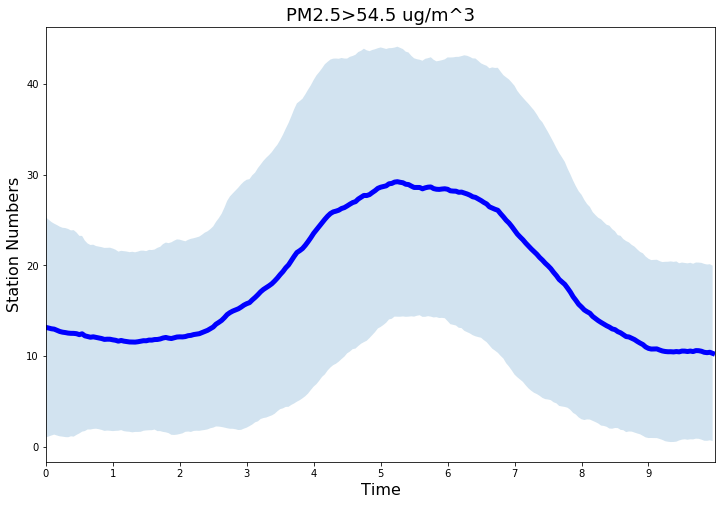

In [15]:
fig = plt.figure(figsize=(12,8))
meanvalue = data11.iloc[:,hc.labels_==0].mean(axis=1)
stdvalue = data11.iloc[:,hc.labels_==0].std(axis=1)
top = meanvalue+stdvalue
bot = meanvalue-stdvalue
plt.plot(np.arange(0,240),meanvalue,'b-',linewidth=5)
#plt.plot(bot,'b.',linewidth=5)
#plt.plot(top,'b.',linewidth=5)
plt.fill_between(np.arange(0,240),top,bot,alpha=0.2)
plt.xticks(np.arange(0,240,step=24),np.arange(0,264))
plt.xlim(0,240)
plt.title('PM2.5>54.5 ug/m^3',fontsize=18)
plt.ylabel('Station Numbers',color='k',fontsize=16)
plt.xlabel('Time',color='k',fontsize=16)
plt.savefig('pm25.png')
#plt.plot(data11.iloc[:,hc.labels_==0].std(axis=1),'b-',linewidth=5)
#plt.plot(data11.iloc[:,hc.labels_==0].mean(axis=1),'b-',linewidth=5)

In [17]:
hr_label = np.empty((1,87648))
hr_label[:,:] = -5
hk_label = np.empty((1,3642))
hk_label[:,:] = -5
#print(hr_label)
for i in range(0,3642):
#    if csmask[i,] == 0 and nemask[i,] == 0 and swmask[i,] == 0  and ftmask[i,] == 0  and tcmask[i,] == 0:
     for j in range(0,24):
      hr_label[0,24*(i+1)]=hc.labels_[i,]
      hk_label[0,i]=hc.labels_[i,]
print(np.sum(hk_label == 0))
print(np.sum(hk_label == 1))
print(np.sum(hk_label == 2))
print(np.sum(hk_label == 3))
print(np.sum(hk_label == 4))
#print(hr_label[0,87300:87648])
#print(hr_label[0,0:50])
pm_ma24.head()
station = pd.read_csv('station.csv',encoding='big5')
finalar=station.loc[:,['測站名稱','經度','緯度']]
latlon=np.empty((2,68))
day10_mean = np.zeros((240,68))

#print(finalar)
for i in range(0,77):
    for j in range(0,68):
#     print(leftstation[j])
     aaaa=finalar.iloc[i,0]
     latlonaa=finalar.iloc[i,1:3]
     alltime = np.empty((1256,240))
     alltime[:,:] = np.nan
     if leftstation[j] in aaaa:
        l=0
        for k in range(0,3642):
            if hk_label[0,k] == 1:
             alltime[l,:] = pm_ma24.iloc[24*(k+1):24*(k+1)+240,j]
             l=l+1
#             print(alltime)
        day10_mean[:,j] = np.nanmean(alltime,0)
        kkkk=alltime
#        print(day10_mean)
        latlon[:,j] = latlonaa
#for i in range(0,63): 
# print(pm_ma24.iloc[:,])
#plt.plot(pm_ma24.mean(axis=1))
#plt.show()
#plt.plot(data11.mean(axis=1))
#plt.show()
#print(hr_label.shape)
#print(pm_ma24.iloc[24*(6+1):24*(6+1)+240,0])
#print(kkkk[0,:])
stationmean=pd.DataFrame(day10_mean,columns=leftstation)
stationmean.head()

259
1256
1613
181
333


,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,陽明,善化,萬里,三重,新營,斗六,中山,新港,安南,林園
0,47.328503,24.541175,22.833011,29.372755,30.555445,41.342555,27.300546,48.957741,21.798911,28.080747,...,14.249564,41.014493,19.656064,33.480049,40.490966,44.389457,31.424199,40.169593,40.391820,46.505055
1,47.345724,24.516727,22.801749,29.342151,30.523106,41.338245,27.301878,48.960964,21.787948,28.044000,...,14.186413,41.019633,19.669977,33.479061,40.385649,44.388889,31.547585,40.123312,40.372943,46.332007
2,47.298562,24.493302,22.827583,29.274655,30.512634,41.320956,27.210940,48.926044,21.770066,27.999165,...,14.159245,40.989204,19.636537,33.510153,40.318516,44.416583,31.524675,40.031477,40.366368,46.303459
3,47.307144,24.474712,22.826524,29.251857,30.515855,41.343177,27.254158,48.853021,21.744744,28.021188,...,14.161887,40.951790,19.622842,33.485010,40.259993,44.431072,31.497661,39.975818,40.359753,46.319461
4,47.336925,24.436400,22.757812,29.227830,30.502478,41.301276,27.321636,48.842074,21.742473,28.034493,...,14.151622,40.939763,19.637821,33.476668,40.190810,44.442466,31.585534,39.928926,40.360278,46.240161


In [18]:
stationinfo=pd.DataFrame(latlon,columns=leftstation)
stationinfo.head()

,嘉義,龍潭,淡水,湖口,苗栗,美濃,大園,前鎮,基隆,板橋,...,陽明,善化,萬里,三重,新營,斗六,中山,新港,安南,林園
0,120.440833,121.216350,121.449239,121.038653,120.820200,120.530542,121.201811,120.307564,121.760056,121.458667,...,121.529583,120.297142,121.689881,121.493806,120.317250,120.544994,121.526528,120.345531,120.218333,120.41175
1,23.462778,24.863869,25.164500,24.900142,24.565269,22.883583,25.060344,22.605386,25.129167,25.012972,...,25.182722,23.115097,25.179667,25.072611,23.305633,23.711853,25.062361,23.554839,23.048333,22.47950


In [19]:
import matplotlib as mpl
import os
#os.environ['PROJ_LIB'] = '/Users/tsyo/anaconda/share/proj/'
os.environ['PROJ_LIB'] = 'D:\\program\\anaconda3\\Library\\share\\'
from mpl_toolkits.basemap import Basemap

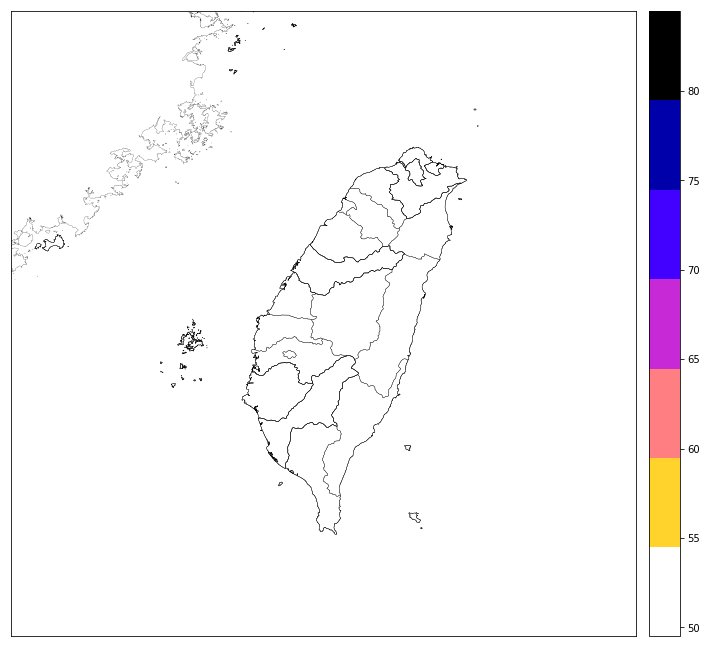

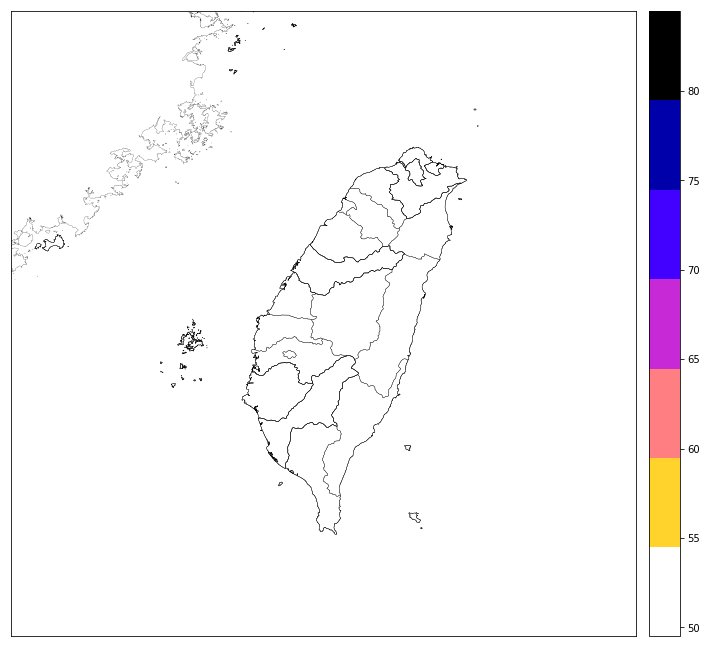

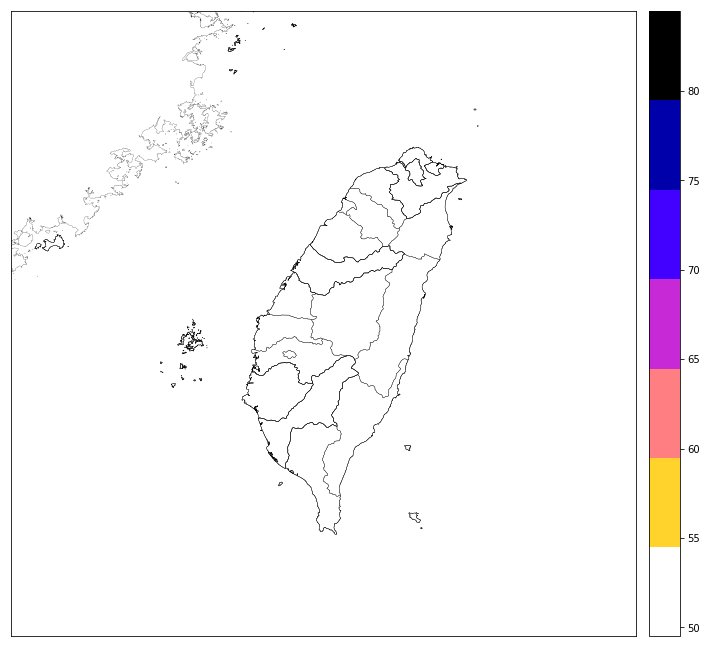

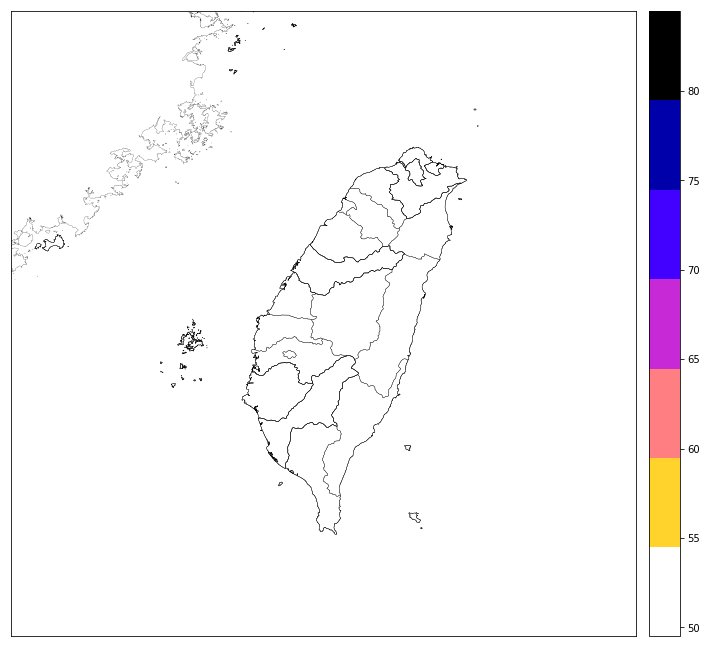

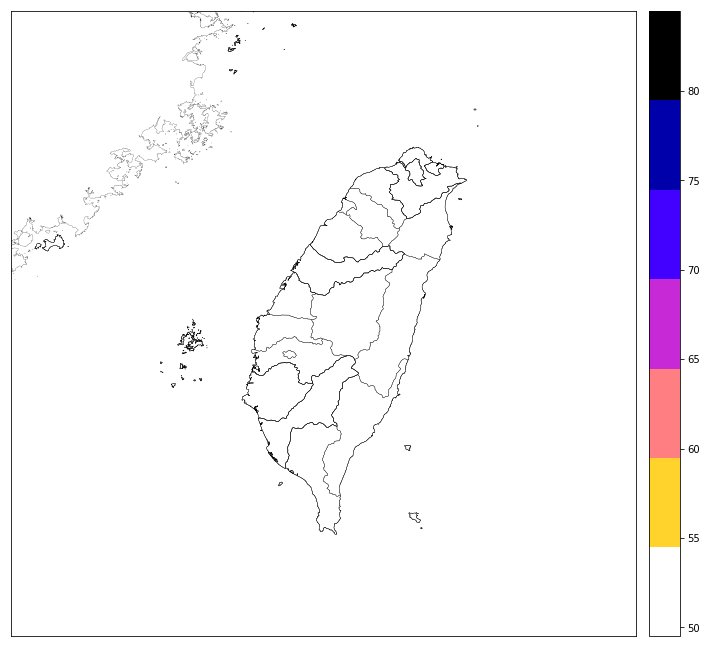

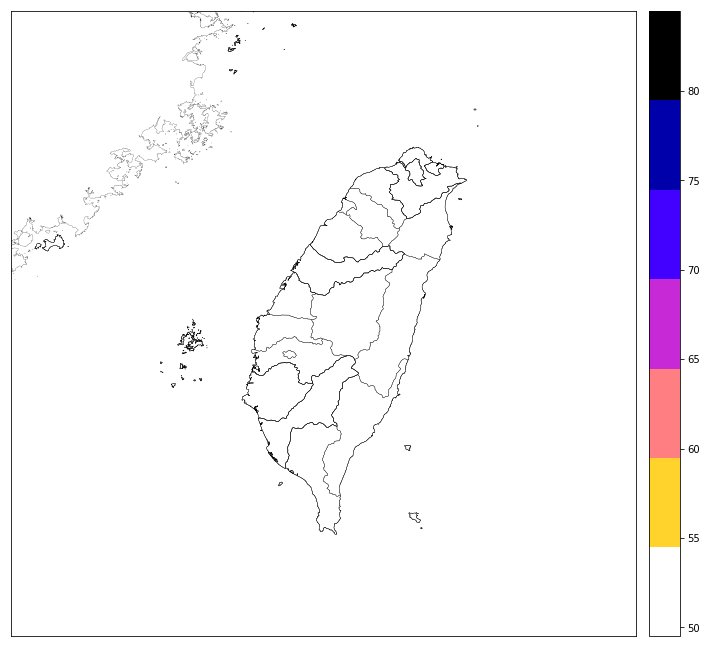

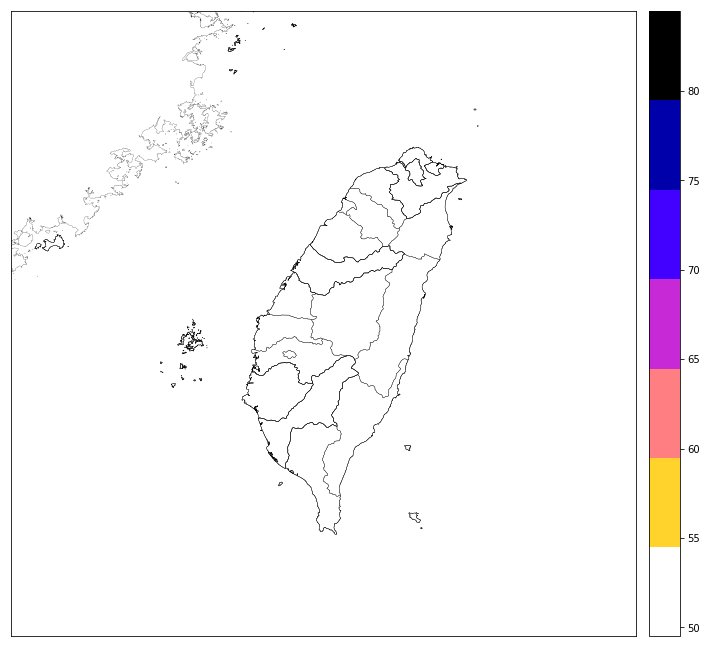

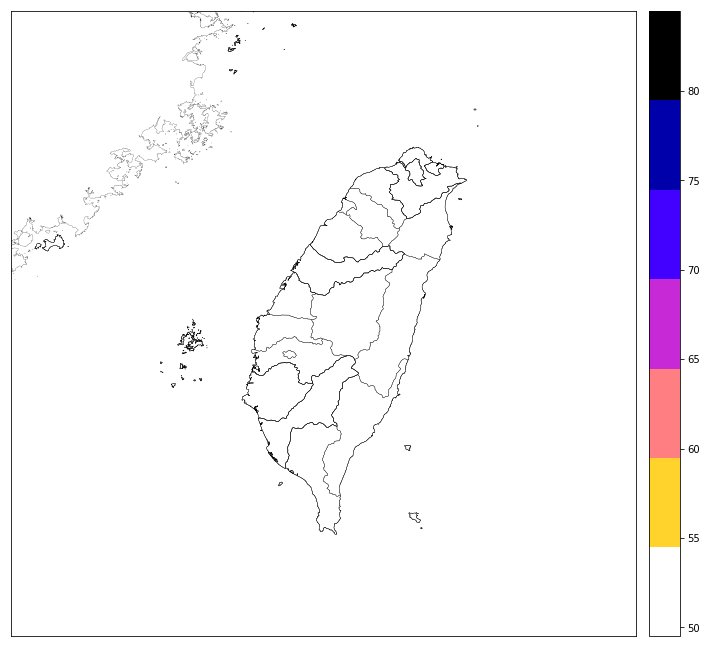

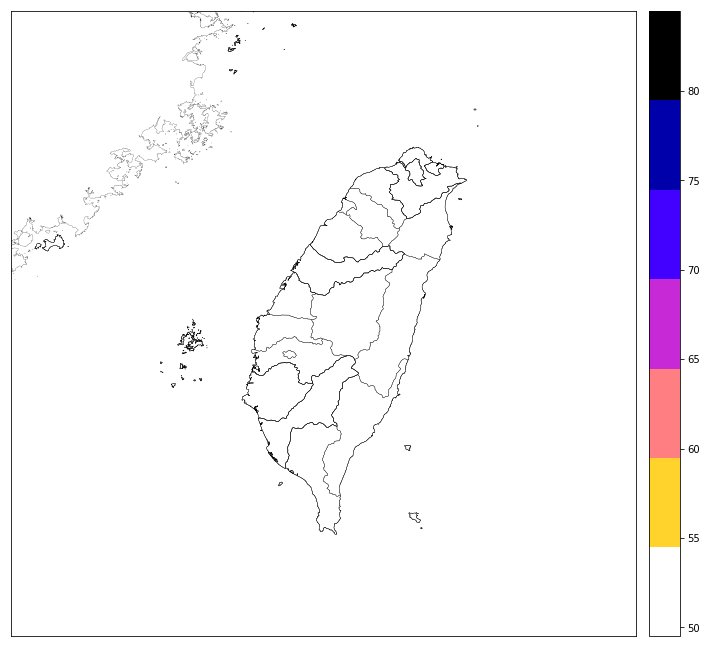

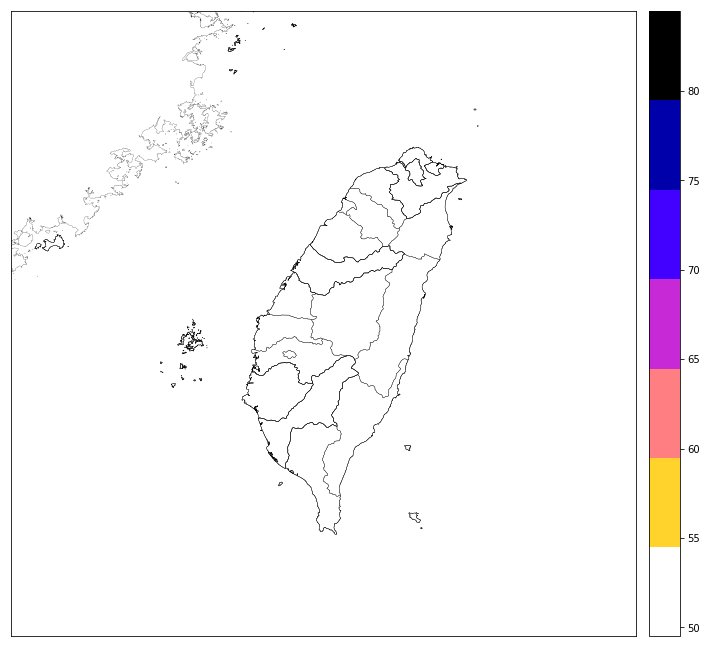

In [20]:
for i in range(0,10):
 fig = plt.figure(figsize=(12,12)) 
 m = Basemap(llcrnrlon=118., urcrnrlon=123.5, llcrnrlat=21., urcrnrlat=26.5,resolution='h')
 m.readshapefile('gadm36_TWN_shp/gadm36_CHN_0', name='Taiwan', linewidth=0.15 , drawbounds=True)
 m.readshapefile('gadm36_TWN_shp/gadm36_TWN_1', name='Taiwan', linewidth=0.3 , drawbounds=True)
 m.readshapefile('gadm36_TWN_shp/gadm36_TWN_2', name='Taiwan', linewidth=0.3 , drawbounds=True)
 #tai = m.scatter(latlon[0,:], latlon[1,:] , s=day10_mean[i*24,:], c=day10_mean[i*24,:], cmap=plt.cm.get_cmap('jet',25), vmin=4.5, vmax=54.5)
 tai = m.scatter(latlon[0,:], latlon[1,:] , s=day10_mean[(i*24),:], c=day10_mean[(i*24),:], cmap=plt.cm.get_cmap('gnuplot2_r',7), vmin=49.5, vmax=84.5)
# tai = m.scatter(latlon[0,:], latlon[1,:] , s=day10_mean[i,:], c=day10_mean[i,:], cmap=plt.cm.get_cmap('gnuplot2_r',7), vmin=49.5, vmax=84.5)
 cbar = m.colorbar(tai)
 plt.savefig('zoutput{0}.png'.format(i))
#plt.show()

In [24]:
aaaaa= hr_label[0,:]==0
print(aaaaa)
p1 =np.where( hc.labels_ == 0 )
p2 =np.where( hc.labels_ == 1 )
p3 =np.where( hc.labels_ == 2 )
p4 =np.where( hc.labels_ == 3 )
p5 =np.where( hc.labels_ == 4 )
#print(p1[0])
p11 = list(p1)
p12 = list(p2)
p13 = list(p3)
p14 = list(p4)
p15 = list(p5)
#all=list(hc.labels_)
#for i in range(0,3642):
 #if all[i] == 3:
  #  print(i)
np.savetxt('outtype11.txt',(p11),fmt='%4.0i')
np.savetxt('outtype22.txt',(p12),fmt='%4.0i')
np.savetxt('outtype33.txt',(p14),fmt='%4.0i')
np.savetxt('outtype44.txt',(p15),fmt='%4.0i')
np.savetxt('outtype55.txt',(p13),fmt='%4.0i')

[False False False ... False False False]


In [ ]:
print(csmask[0,0])